# Exercise: Read Text With Computer Vision Service

In this notebook, use the `ComputerVisionClient` object found in the Azure Cognitive Services Python SDK to explore the Optical Character Recognition (OCR) capabilities of Azure Computer Vision.

> **Important**: Several cells in this notebook contain `TODO` statements, where you need to update variables or enter code to enable the cell to execute without errors.

## Setup the notebook

### Install the Azure Cognitive Service Computer Vision Library

To access the Computer Vision service from this Python notebook, you need to install the Azure Cognitive Services Computer Vision Library. This library is part of the [Azure SDK for Python](https://github.com/Azure/azure-sdk-for-python) GitHub project.

> To learn more, read the [Azure Cognitive Services modules for Python](https://docs.microsoft.com/python/api/overview/azure/cognitive-services?view=azure-python) article in Microsoft Docs.

`TODO`: In the cell below, complete the `pip install` command to install the Azure Cognitive Services Computer Vision library, and then execute the cell.

In [1]:
pip install azure-cognitiveservices-vision-computervision

Note: you may need to restart the kernel to use updated packages.


### Import libraries and services

In addition to the Computer Vision library, we will also make use of a few other Python libraries in this notebook. Run the following cell to import the libraries and reference the services required to execute the cells below.

In [3]:
# Import the libraries need to access the Computer Vision services
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials

# Import a few utility libraries
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import time

## Set variables

To access your Computer Vision service, its authentication key and endpoint URL need to be supplied to client applications.

### Retrieve and set the `key` and `endpoint` values from your Custom Vision prediction service.

`TODO`: Using the values from the `Keys and Endpoints` page for you Custom Vision prediction service, replace the tokenized values in the cell below, as follows:

- Retrieve the `Key 1` value for your prediction cognitive services resource in the Azure portal and update the `key` value below.
- Retrieve the `Endpoint` value for your prediction cognitive services resource in the Azure portal and update the `endpoint` value below.

> **Important**: You **must** replace the variable values below with the values from your Custom Vision prediction endpoint or the remaining cells in this notebook will fail.

In [4]:
# TODO: Update the values assigned to the variables below
key = 'd1b33c8b0af44e8d83c76b0e5091c089'
endpoint = 'https://udacity-cog-services-jg1.cognitiveservices.azure.com/'

print('Ready to perform OCR using the Computer Vision service at "{}" using the key "{}."''"'.format(endpoint, key))

Ready to perform OCR using the Computer Vision service at "https://udacity-cog-services-jg1.cognitiveservices.azure.com/" using the key "d1b33c8b0af44e8d83c76b0e5091c089.""


## Create a Computer Vision client

After setting the `key` and `endpoint` needed to access your Computer Vision service, you can instantiate a client.

`TODO`: Complete the code below to instantiate a new `ComputerVisionClient`, authenticating against your Azure Cogntive Services account, and then execute the cell below to create the `ComputerVisionClient` object.

In [6]:
# Instantiate a Computer Vision client
credentials = CognitiveServicesCredentials(key)
client = ComputerVisionClient(endpoint, credentials)

## Using the OCR API

### Read text from an image

Use the optical character recognition (OCR) API to extract text from images. The image is of a street sign.

Text(0.5, 0.98, 'Success Just Ahead ')

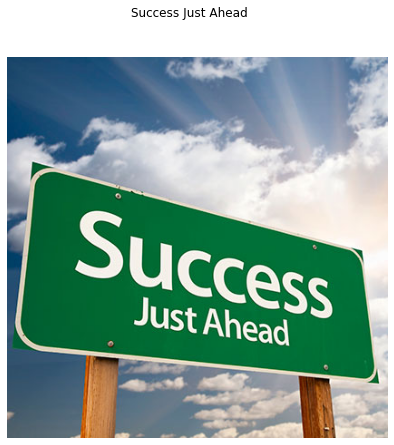

In [7]:
%matplotlib inline

# Create a matplotlib figure to display the classification results
fig = plt.figure(figsize=(7, 7))

# Read an image file into a stream
path = os.path.join('images', 'sign.jpg')

# Extract text from the image using the Computer Vision service
with open(path, "rb") as stream:
    ocr = client.recognize_printed_text_in_stream(stream)

text = ''

# Process the OCR text one line at a time
for region in ocr.regions:
    for line in region.lines:
        # Read the OCR'ed text from each line
        for word in line.words:
            text += word.text + ' '

# Display the image with its extracted text
img = Image.open(path)
draw = ImageDraw.Draw(img)
plt.axis('off')
plt.imshow(img)

fig.suptitle(text) 

## Add bounding boxes

Using the OCR API, you can also draw bounding boxes around each unique string of text identified during the OCR process. 

Text(0.5, 0.98, 'Success Just Ahead ')

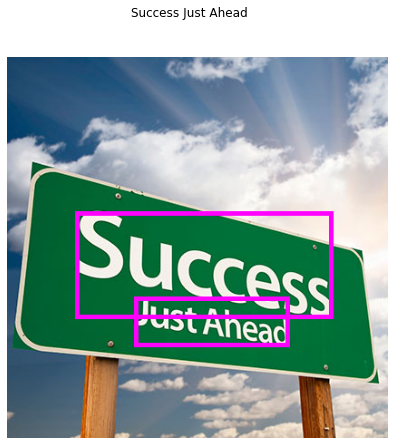

In [8]:
# Create a matplotlib figure to display the classification results
fig = plt.figure(figsize=(7, 7))

# Display the image with its extracted text inside bounding boxes
img = Image.open(path)
draw = ImageDraw.Draw(img)

# Process the text one line at a time, drawing the appropriate bounding box
for region in ocr.regions:
    for line in region.lines:
        # Draw the bounding box for each line of text
        l,t,w,h = list(map(int, line.bounding_box.split(',')))
        draw.rectangle(((l,t), (l+w, t+h)), outline='magenta', width=5)

# Show the image with the text locations highlighted by bounding boxes
plt.axis('off')
plt.imshow(img)
fig.suptitle(text) 

## Using the Read API

The `Read API` is the preferred way of performing OCR functions using Computer Vision. While the `OCR API` is still available, it is more limited in its capabilities and is in the process of being deprecated. To help provide a better understanding of the `Read API`, let's look at some of the operations available through the Python SDK `ComputerVisionClient` object.

## Read scanned documents

The `Read API` is designed to handle reading larger amounts of text from scanned documents, for example.

To use the `Read API`, you must send an image to the Computer Vision service and it will be read and analyzed asynchronously by the service. This means you must send follow-on requests to check the status of the operation and retrieve the results when processing is completed.

`TODO`: In the cell below, there are two `TODO` statements where you need to complete the code.

- For the first `TODO`, complete the line `operation = client.` so that you can asynchronously send the image to be processed by the `Read API`.
- The second `TODO` relates to checking the status of your read request. Complete the line `result = client.` to add a check for the result of the read operation.

Once the `TODOs` have been completed, execute the cell below to send an image to your Computer Vision service and then wait for the results. When results are available, retrieve and display them.

Clinical
Protocol for Diagnosis
classification
Mild
1. Individuals who test positive for SARS-COV-2 with RT-PCR.
2. The clinical symptoms were mild.
3. With or without fever or respiratory diseases.
4. With or without showed obvious lung infiltrates on chest
computed tomography (CT).
Severe
1. shortness of breath and respiratory rate (RR) 230 times/min.
2. A saturation of oxygen (SpO2) <93% at rest.
3. Ratio of arterial partial pressure of oxygen to fraction of
inspired oxygen (Pa02/FiO2) <300 mmHg (1mmHg
=0.133kPa) on room air at sea level. * In high-altitude areas
(at an altitude of over 1,000 meters above the sea level),
PaO2/FiO2 shall be corrected by the following formula: PaO2/
FiO2 x [Atmospheric pressure (mmHg)/760].
4. Cases with chest imaging that showed obvious lung infiltrates
>50% within 48 h.
5. Individuals who have respiratory failure, septic shock, and/or
multiple organ failure.




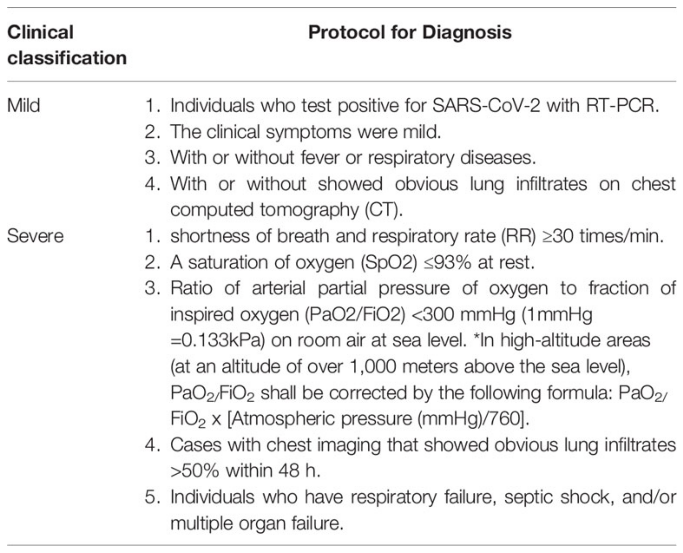

In [9]:
%matplotlib inline

# Read a scanned image into a stream
path = os.path.join('images', 'diagnosis.jpg')

# Send an async request to read text within the image
with open(path, "rb") as stream:
    operation = client.read_in_stream(stream, raw=True)
    
# Extract the operation ID from the response headers
locationHeader = operation.headers["Operation-Location"]
operationId = locationHeader.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    result = client.get_read_result(operationId)
    if result.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# When the operation has completed successfully, print each line of text returned to the output
if result.status == OperationStatusCodes.succeeded:
    for res in result.analyze_result.read_results:
        for line in res.lines:
            print(line.text)

# Display the image analyzed for comparision to the OCR'ed text results
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(path)
plt.axis('off')
plt.imshow(img)

## Read PDF documents

In addition to reading scanned documents, the `Read API` is specifically designed to process vast amounts of text found in documents, such as PDFs. Unlike the `OCR API`, the `Read API` performs OCR operations asynchronously, allowing it to handle large documents and not lock processing threads in applications while waiting for results.

`TODO`: In the cell below, there are three `TODO` statements where you need to complete the code.

- For the first `TODO`, complete the line `operation = client.` so that you can asynchronously send the image to be processed by the `Read API`.
- The second `TODO` relates to checking the status of your read request. Complete the line `result = client.` to add a check for the result of the read operation.
- In the final `TODO`, complete the line to retrieve the read results of the OCR operation.

Once the `TODOs` have been completed, execute the cell below to send an image to your Computer Vision service and then wait for the results. When results are available, retrieve and display them.

In [10]:
# Read a PDF document into a stream
path = os.path.join('docs', 'knowledge-mining.pdf')

# Send an async request to read text within the document
with open(path, "rb") as stream:
    operation = client.read_in_stream(stream, raw=True)

# Extract the operation ID from the response headers
locationHeader = operation.headers["Operation-Location"]
operationId = locationHeader.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    result = client.get_read_result(operationId)
    if result.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# When the operation has completed successfully, print each line of text returned to the output
if result.status == OperationStatusCodes.succeeded:
    for res in result.analyze_result.read_results:
        for line in res.lines:
            print(line.text)

A DEVELOPER’S GUIDE TO BUILDING AI-DRIVEN
KNOWLEDGE MINING SOLUTIONS
Unlock actionable insights from all your content with Azure Cognitive Search
Microsoft
Executive Summary
Businesses collect a staggering amount of data every day, primarily in unstructured formats. Across virtually all
industries, organizations can realize significant benefits by harnessing and refining the information contained within this
raw data. To do so, they need a process for extracting structured data from unstructured content, making it more
consumable by business systems, from search to analytics.
Knowledge mining is an emerging category in AI, which refers to the orchestration of a series of AI services to uncover
latent insights in vast amounts of data. Knowledge mining solutions make it easier for developers to bring the benefits of
AI into their organizations, whether it’s enhancing search functionality in business applications or improving business
processes through automation.
Conceptually, it is easy

## Read Handwritten Text

In addition to printed text, the `Read API` is also capable of reading handwritten text.

`TODO`: In the cell below, there are three `TODO` statements where you need to complete the code.

- For the first `TODO`, complete the line `operation = client.` so that you can asynchronously send the image to be processed by the `Read API`.
- The second `TODO` relates to checking the status of your read request. Complete the line `result = client.` to add a check for the result of the read operation.
- In the final `TODO`, complete the line to retrieve the read results of the OCR operation.

Once the `TODOs` have been completed, execute the cell below to send an image to your Computer Vision service and then wait for the results. When results are available, retrieve and display them.

Never Stop
DREAMING




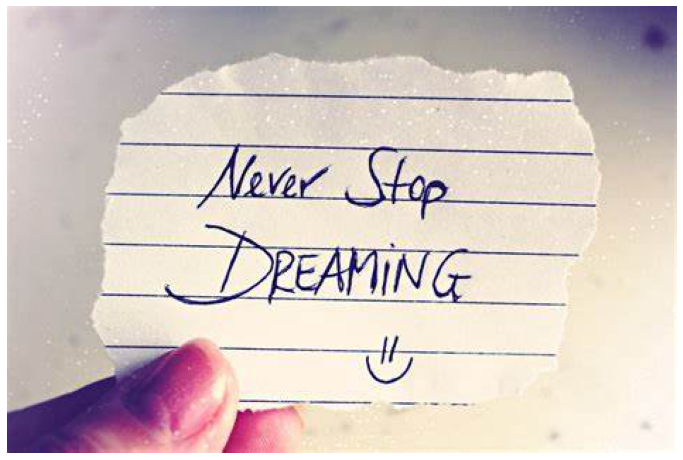

In [11]:
%matplotlib inline

# Read an image file into a stream
path = os.path.join('images', 'note.jpg')

# Send an async request to read text within the image
with open(path, "rb") as stream:
    operation = client.read_in_stream(stream, raw=True)
    
# Extract the operation ID from the response headers
locationHeader = operation.headers["Operation-Location"]
operationId = locationHeader.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    result = client.get_read_result(operationId)
    if result.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# When the operation has completed successfully, print each line of text returned to the output
if result.status == OperationStatusCodes.succeeded:
    for res in result.analyze_result.read_results:
        for line in res.lines:
            print(line.text)

# Display the image analyzed for comparision to the OCR'ed text results
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(path)
plt.axis('off')
plt.imshow(img)